<a href="https://colab.research.google.com/github/AntonioGarciaData/PROYECT_ML_DL/blob/main/Codigo_ArbolDeDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
anemia = pd.read_csv('DataSetAnemia.csv', sep=";")

In [ ]:
anemia_clases = ['Normal', 'Anemia_Leve', 'Anemia_Moderada', 'Anemia_Severa']
print(anemia.columns[0:8].values, 'TipoAnemia')

['Diresa' 'Sexo' 'Edad' 'Peso' 'Talla' 'Hemoglobina' 'Hbc' 'Dx_Anemia'] TipoAnemia


In [ ]:
for index, row in anemia.sample(10).iterrows():
    print('[', row[0], row[1], row[2], row[3], row[4], row[5],
          row[6], int(row[7]), ']', anemia_clases[int(row[7])])

[ LA LIBERTAD F 19 11.0 78.0 10.4 8.4 2 ] Anemia_Moderada
[ PIURA M 37 13.0 90.0 9.7 9.71 2 ] Anemia_Moderada
[ LAMBAYEQUE M 48 16.6 100.0 10.5 10.5 1 ] Anemia_Leve
[ PIURA M 50 14.7 98.0 10.7 10.7 1 ] Anemia_Leve
[ LA LIBERTAD M 59 19.6 1.06 9.1 9.1 2 ] Anemia_Moderada
[ TUMBES M 25 11.2 83.5 9.8 9.8 2 ] Anemia_Moderada
[ TUMBES M 33 13.6 95.3 9.6 9.6 2 ] Anemia_Moderada
[ LAMBAYEQUE F 37 13.5 93.5 9.2 8.05 2 ] Anemia_Moderada
[ LAMBAYEQUE M 15 9.2 71.0 11.0 9.06 2 ] Anemia_Moderada
[ PIURA M 22 11.0 84.7 9.0 9.0 2 ] Anemia_Moderada


In [ ]:
# Separamos las caracteristicas y etiquetas
from sklearn.model_selection import train_test_split

caracteristicas = ['Edad','Peso','Talla','Hbc']
clasificacion = 'Dx_Anemia'
anemia_x, anemia_y = anemia[caracteristicas].values, anemia[clasificacion].values

In [ ]:
# Dividimos la data en 75%-25% para entrenamiento y testeo respectivamente

x_entrenamiento, x_testeo, y_entrenamiento, y_testeo = train_test_split(anemia_x, anemia_y, test_size=0.25, random_state=0,
    stratify=anemia_y)

In [ ]:
# Codificamos el arbol de decision

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


In [ ]:
arbol = DecisionTreeClassifier()

arbol.fit(x_entrenamiento,y_entrenamiento)
arbol.score(x_testeo,y_testeo)
arbol.score(x_entrenamiento,y_entrenamiento)

1.0

In [ ]:
# Predicciones

anemia_predictions = arbol.predict(x_testeo)

print('\nClasificaciones predichas: ', anemia_predictions[:15])
print('\nClasificaciones reales   : ' ,y_testeo[:15])
print('\n')


Clasificaciones predichas:  [0 2 2 0 0 2 0 0 0 2 1 0 0 0 2]

Clasificaciones reales   :  [0 2 2 0 0 2 0 0 0 2 1 0 0 0 2]




In [ ]:
# Presentamos reporte de clasificacion

from sklearn. metrics import classification_report

print(classification_report(y_testeo, anemia_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00       833
           3       0.99      1.00      0.99        75

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [ ]:
# Presentamos matriz de confusion

from sklearn.metrics import confusion_matrix

mcm = confusion_matrix(y_testeo, anemia_predictions)
print("Matriz de confusion\n")
print(mcm)

Matriz de confusion

[[394   0   0   0]
 [  0 198   0   0]
 [  0   0 832   1]
 [  0   0   0  75]]


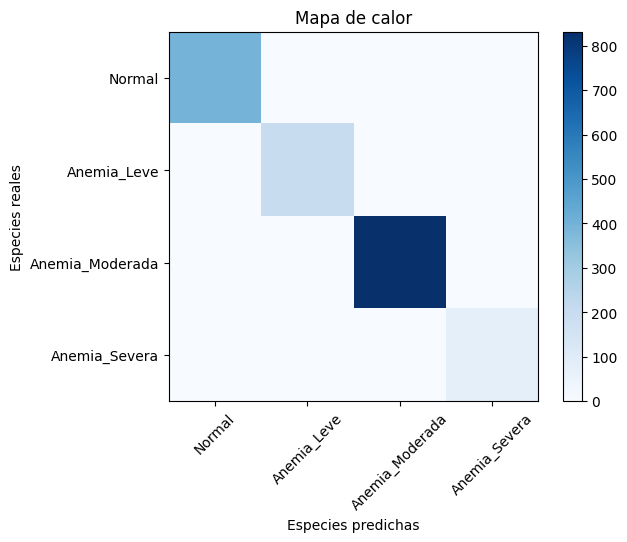

In [ ]:
# Presentamos mapa de calor
import matplotlib.pyplot as plt
import numpy as np

plt.title('Mapa de calor')
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(anemia_clases))
plt.xticks(tick_marks, anemia_clases, rotation=45)
plt.yticks(tick_marks, anemia_clases)
plt.xlabel("Especies predichas")
plt.ylabel("Especies reales")
plt.show()

In [ ]:
# Presentamos matriz de confusion

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Obtenemos los puntajes de probabilidad de clase
anemia_prob = arbol.predict_proba(x_testeo)

# Obtenemos las metricas de ROC para cada clase
fpr = {}
tpr = {}
thresh ={}
for i in range(len(anemia_clases)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_testeo, anemia_prob[:,i], pos_label=i)

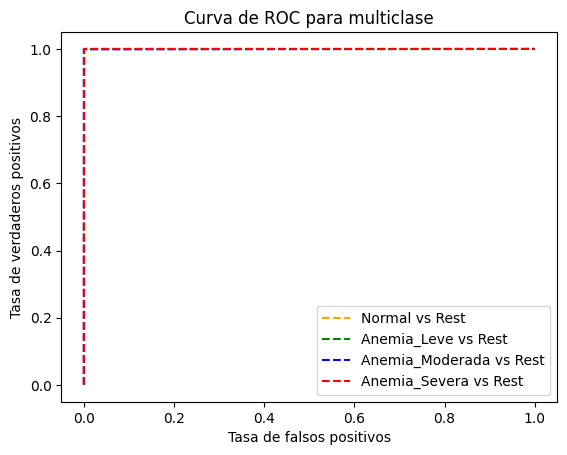

In [ ]:
# Presentamos el grafico de ROC

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=anemia_clases[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=anemia_clases[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=anemia_clases[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=anemia_clases[3] + ' vs Rest')
plt.title('Curva de ROC para multiclase')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend(loc='best')
plt.show()

In [ ]:
# Presentamos el promedio del area bajo la curva de ROC

auc = roc_auc_score(y_testeo,anemia_prob, multi_class='ovr')

print('\nAUC promedio:', auc)


AUC promedio: 0.9997622206777448


In [ ]:
# Presentamos el error medio cuadrado

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Desviación estándar de la varianza inexplicada
mse = mean_squared_error(y_testeo, anemia_predictions)
print("\nMSE:", mse)

mae=mean_absolute_error(anemia_predictions, y_testeo)
print("\nMAE:", mae)
# Desviación estándar de la varianza inexplicada
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Coeficiente de determinacion
r2 = r2_score(y_testeo, anemia_predictions)
print("R2:", r2)


MSE: 0.0006666666666666666

MAE: 0.0006666666666666666
RMSE: 0.025819888974716113
R2: 0.9992282279238457


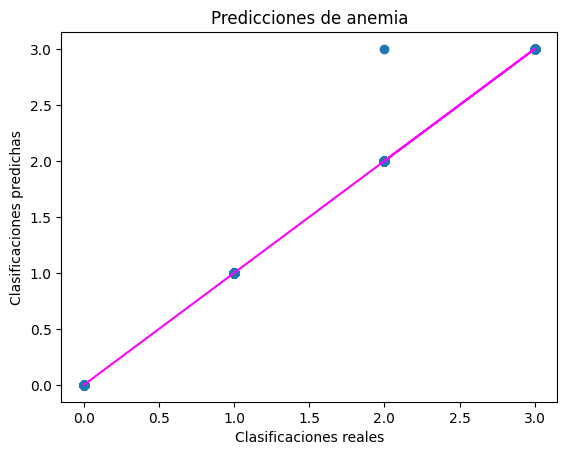

In [ ]:
plt.scatter(y_testeo, anemia_predictions)
plt.xlabel('Clasificaciones reales')
plt.ylabel('Clasificaciones predichas')
plt.title('Predicciones de anemia')
z = np.polyfit(y_testeo, anemia_predictions, 1)
p = np.poly1d(z)
plt.plot(y_testeo,p(y_testeo), color='magenta')
plt.show()

[Text(0.5, 0.9285714285714286, 'Hbc <= 9.995\nsamples = 4500\nvalue = [1184, 593, 2498, 225]\nclass = Anemia_Moderada'),
 Text(0.3, 0.7857142857142857, 'Hbc <= 7.005\nsamples = 2723\nvalue = [0, 0, 2498, 225]\nclass = Anemia_Moderada'),
 Text(0.2, 0.6428571428571429, 'Hbc <= 6.995\nsamples = 227\nvalue = [0, 0, 2, 225]\nclass = Anemia_Severa'),
 Text(0.1, 0.5, 'samples = 220\nvalue = [0, 0, 0, 220]\nclass = Anemia_Severa'),
 Text(0.3, 0.5, 'Talla <= 69.45\nsamples = 7\nvalue = [0, 0, 2, 5]\nclass = Anemia_Severa'),
 Text(0.2, 0.35714285714285715, 'samples = 1\nvalue = [0, 0, 1, 0]\nclass = Anemia_Moderada'),
 Text(0.4, 0.35714285714285715, 'Edad <= 21.5\nsamples = 6\nvalue = [0, 0, 1, 5]\nclass = Anemia_Severa'),
 Text(0.3, 0.21428571428571427, 'samples = 3\nvalue = [0, 0, 0, 3]\nclass = Anemia_Severa'),
 Text(0.5, 0.21428571428571427, 'Edad <= 27.0\nsamples = 3\nvalue = [0, 0, 1, 2]\nclass = Anemia_Severa'),
 Text(0.4, 0.07142857142857142, 'samples = 1\nvalue = [0, 0, 1, 0]\nclass = A

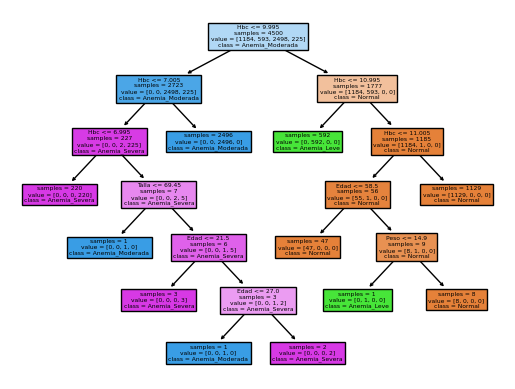

In [ ]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=arbol,class_names=anemia_clases,
               feature_names=caracteristicas,impurity=False,filled=True)

In [ ]:
# Ingresamos un arreglo con las caracteristicas de la persona 

x_persona = np.array([[60,17.9,105,11.19]])
print ('\nPersona de prueba: [Edad, Peso, Talla, Hbc]'
       ' -> {}'.format(x_persona[0]))

# El modelo devuelve una prediccion

anemia_pred = arbol.predict(x_persona)[0]
print('\nEl nivel de anemia de la persona es:', anemia_clases[anemia_pred])
print('\n')


Persona de prueba: [Edad, Peso, Talla, Hbc] -> [ 60.    17.9  105.    11.19]

El nivel de anemia de la persona es: Normal


